In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('./avo_combo_change.csv')
df = df.fillna(' ')
df = df.drop('Unnamed: 0', axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df

,Date,0,1,2,3,4,5,6,7,8,...,Unemployment Rate,Labor Force Participation Rate,Personal Consumption Expenditures,Trade Balance,Real Export,Personal Income,Personal Saving,quarter,year,dates
0,2015-01-04,[PDF] THE U.S. MARKET FOR AVOCADO - USAID,An Avocado Success Story | Mercatus Center,Column: An avocado success story - Tampa Bay T...,[PDF] Examining Consumer Preferences Within th...,"The rise of the avocado, America's new favorit...",[PDF] Sample Avocado Production Costs and Prof...,The Selling of the Avocado - The Atlantic,Avocados more expensive in Chile than in the N...,California's Drought Pushes Food Prices Higher,...,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-01-01
1,2015-01-25,[PDF] THE U.S. MARKET FOR AVOCADO - USAID,An Avocado Success Story | Mercatus Center,Column: An avocado success story - Tampa Bay T...,[PDF] Examining Consumer Preferences Within th...,"The rise of the avocado, America's new favorit...",[PDF] Sample Avocado Production Costs and Prof...,The Selling of the Avocado - The Atlantic,Avocados more expensive in Chile than in the N...,Have You Eaten Your Last Avocado?,...,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-01-01
2,2015-02-01,An Avocado Success Story | Mercatus Center,[PDF] THE U.S. MARKET FOR AVOCADO - USAID,Column: An avocado success story - Tampa Bay T...,[PDF] Examining Consumer Preferences Within th...,"The rise of the avocado, America's new favorit...",[PDF] Sample Avocado Production Costs and Prof...,The Selling of the Avocado - The Atlantic,Have You Eaten Your Last Avocado?,Avocados more expensive in Chile than in the N...,...,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-02-01
3,2015-02-15,An Avocado Success Story | Mercatus Center,[PDF] THE U.S. MARKET FOR AVOCADO - USAID,Column: An avocado success story - Tampa Bay T...,[PDF] Examining Consumer Preferences Within th...,"The rise of the avocado, America's new favorit...",[PDF] Sample Avocado Production Costs and Prof...,"Thanks to America, We've Reached Peak Avocado",The Selling of the Avocado - The Atlantic,Have You Eaten Your Last Avocado?,...,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-02-01
4,2015-03-01,An Avocado Success Story | Mercatus Center,[PDF] THE U.S. MARKET FOR AVOCADO - USAID,Column: An avocado success story - Tampa Bay T...,[PDF] Examining Consumer Preferences Within th...,"The rise of the avocado, America's new favorit...",[PDF] Sample Avocado Production Costs and Prof...,"Thanks to America, We've Reached Peak Avocado",The Selling of the Avocado - The Atlantic,Have You Eaten Your Last Avocado?,...,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2018-01-21,How Price Affects Avocado Eaters - Econlife,China's middle class is boosting demand for av...,How Lower Avocado Prices Relate to Supply and ...,Avocado off the menu as shortage sends prices ...,Solved Consider the supply of avocados. Explai...,Mexico Fresh Avocado wholesale market price - ...,Avocado prices could spike thanks to a short s...,"Avocado prices to reach $4 as demand surges, s...",Mexican avocado producers discredit NAFTA 'Ame...,...,3.9,62.9,13850.8,-44120.0,2.2,15493.0,1124.3,Q1,2018,2018-01-01
85,2018-01-28,How Price Affects Avocado Eaters - Econlife,China's middle class is boosting demand for av...,How Lower Avocado Prices Relate to Supply and ...,Avocado off the menu as shortage sends prices ...,Solved Consider the supply of avocados. Explai...,Mexico Fresh Avocado wholesale market price - ...,Avocado prices at record high due to reduced h...,Avocado prices could spike thanks to a short s...,"Avocado prices to reach $4 as demand surges, s...",...,3.9,62.9,13850.8,-44120.0,2.2,15493.0,1124.3,Q1,2018,2018-01-01
86,2018-02-04,How Price Affects Avocado Eaters - Econlife,China's middle class is boosting demand for av...,How Lower Avocado Prices Relate to Supply and ...,Avocado off the menu as shortag

In [3]:
y = df['AveragePrice']

numerical_features = df[['Unemployment Rate', 'Labor Force Participation Rate', 'Personal Consumption Expenditures', 'Trade Balance', 'Real Export', 'Personal Income', 'Personal Saving']]

text_features = df[['0','1' ,'2']]

In [4]:
text_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
text_features_vectorized0 = text_vectorizer.fit_transform(text_features[text_features.columns[0]])
text_features_vectorized1 = text_vectorizer.fit_transform(text_features[text_features.columns[1]])
text_features_vectorized2 = text_vectorizer.fit_transform(text_features[text_features.columns[2]])

In [5]:
# Combine text and numerical features
X = pd.concat([pd.DataFrame(text_features_vectorized0.toarray()), numerical_features], axis=1)
X = pd.concat([pd.DataFrame(text_features_vectorized1.toarray()), X], axis=1)
X = pd.concat([pd.DataFrame(text_features_vectorized2.toarray()), X], axis=1)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
predictions_test = model.predict(X_test)

In [9]:
# Evaluate the model on test set
mse = mean_squared_error(y_test, predictions_test)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.00642796854532103


In [10]:
# Predictions across whole dataset
predictions_all = model.predict(X)

In [11]:
df['predictions'] = predictions_all

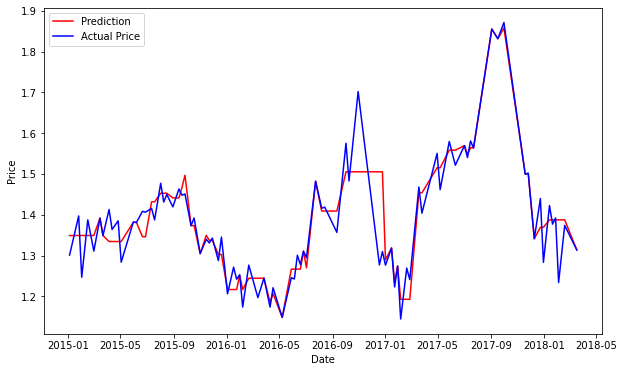

In [12]:
plt.figure(figsize=(10, 6))

plt.plot(pd.to_datetime(df['Date']), df['predictions'], label='Prediction', color='red')
plt.plot(pd.to_datetime(df['Date']), df['AveragePrice'], label='Actual Price', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()